# Importantando Base de Dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tips.csv')
df

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


### Renomeando as nossas colunas (tradução)

In [3]:
renomear = {'total_bill' : 'valor_da_conta',
            'tip' : 'gorjeta',
            'dessert' : 'sobremesa',
            'day' : 'dia_da_semana',
            'time': 'hora_do_dia',
            'size': 'total_de_pessoas'
}

In [4]:
gorjetas = df.rename(columns = renomear)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [5]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [6]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [7]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
dias = {'Sun' : 'Domingo', 'Sat' : 'Sábado', 'Thur' : 'Quinta', 'Fri': 'Sexta'}

In [9]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [10]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [11]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [12]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [13]:
import seaborn as sns

### Análise 1 - Valor da conta e Gorjeta

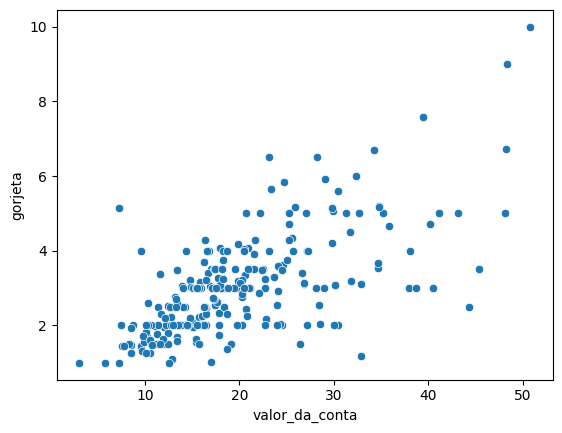

In [14]:
valor_gorjeta = sns.scatterplot(x ='valor_da_conta', y ='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [15]:
print('A base de dados contém {} registros.\n'. format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

### Criando o campo porcentagem

In [16]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [17]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


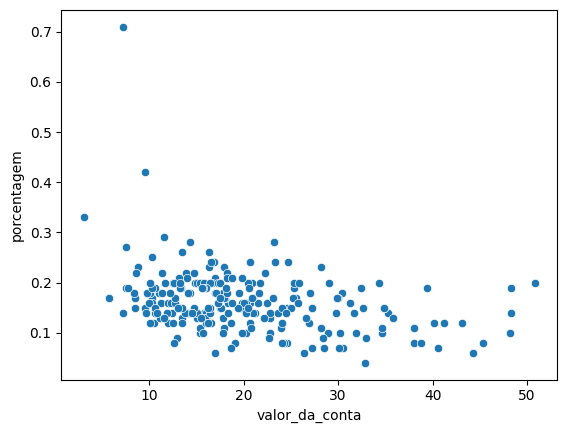

In [18]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

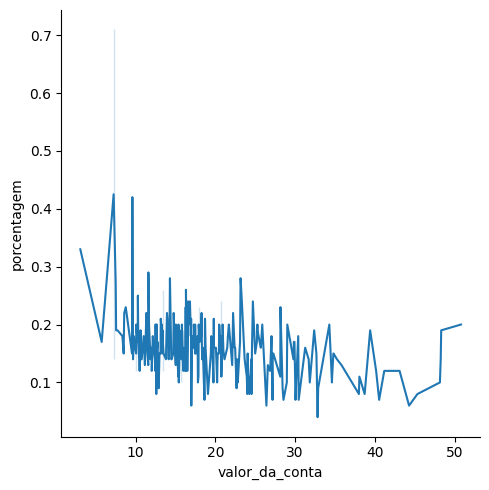

In [19]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind='line', data=gorjetas)

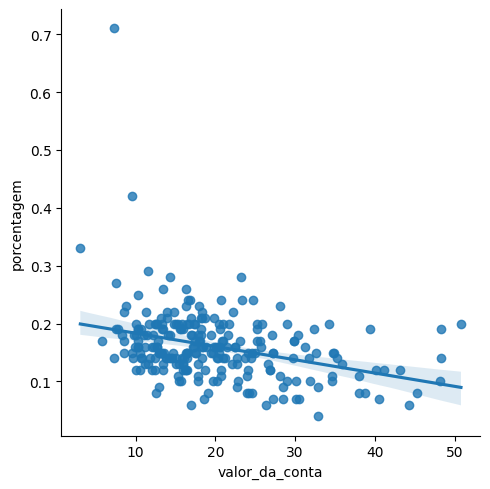

In [20]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data=gorjetas)

### Análise 2 - Sobremesa

In [21]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [22]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


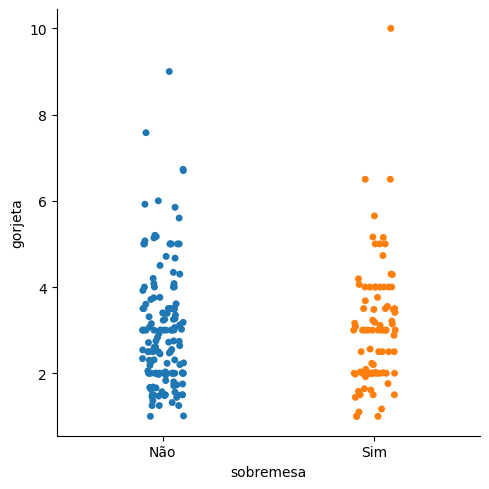

In [23]:
sns.catplot(x='sobremesa', y ='gorjeta', hue='sobremesa', data=gorjetas)

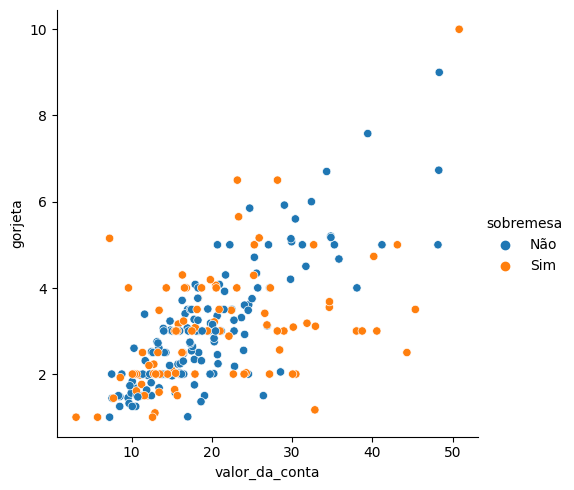

In [24]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

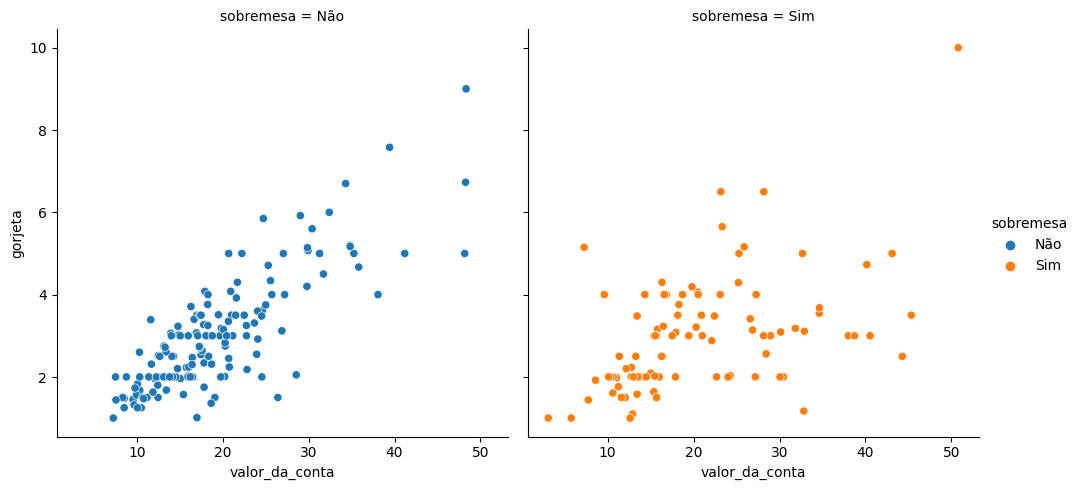

In [25]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

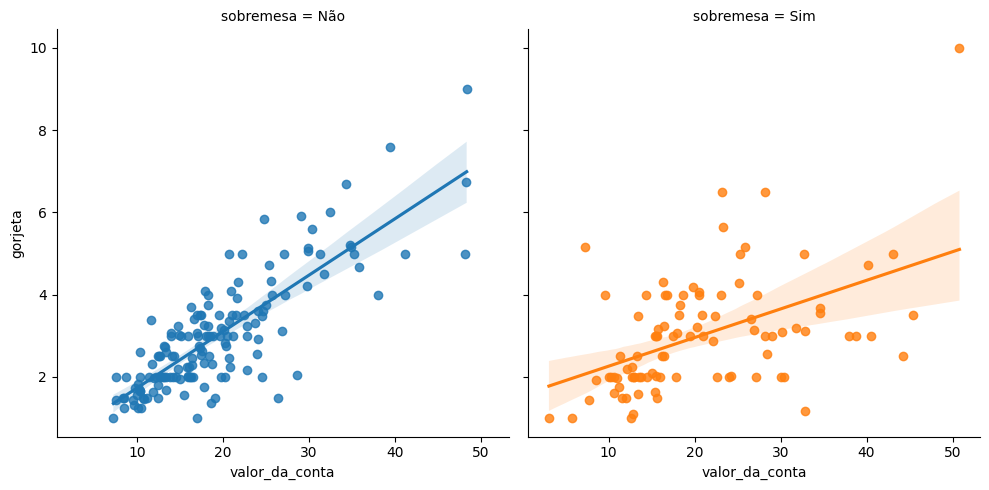

In [26]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

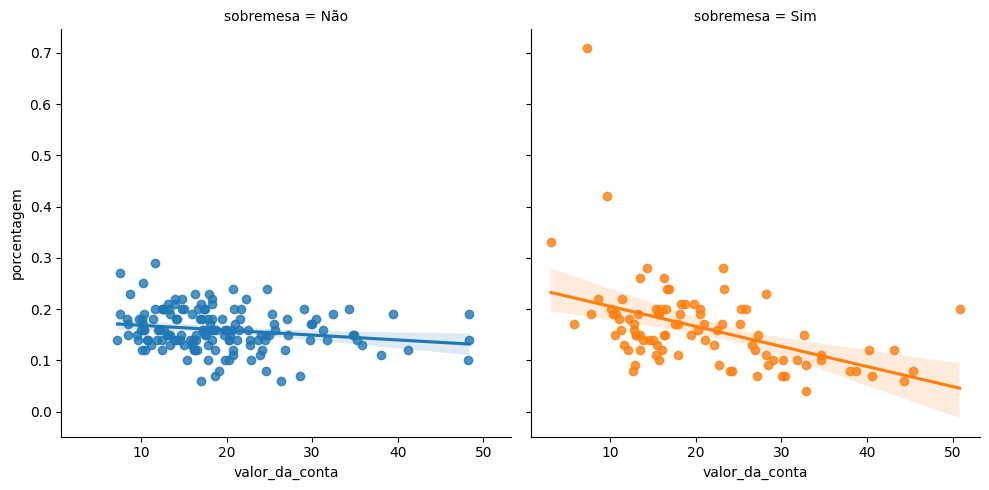

In [27]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

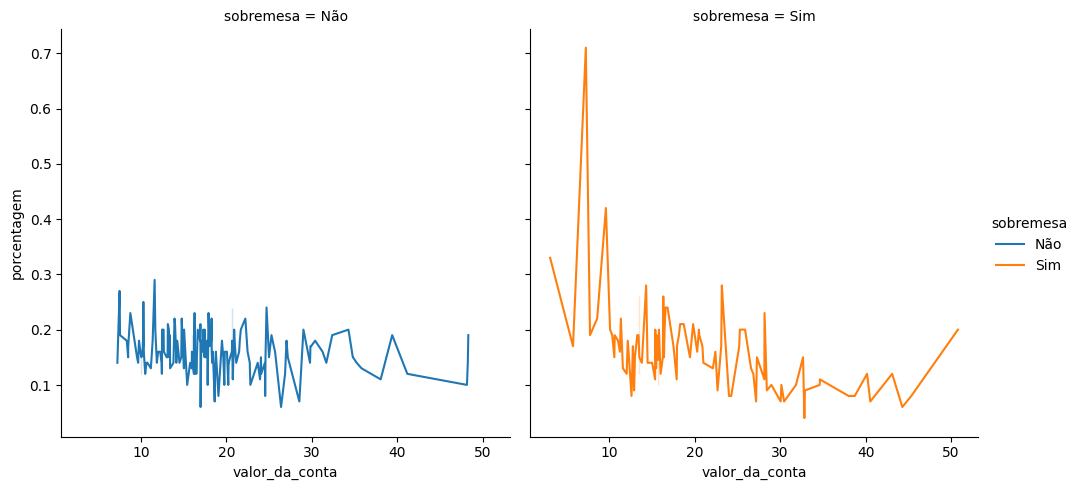

In [28]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

## Teste de Hipotese

**H<sup>null</sup> → A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup> → A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [29]:
from scipy.stats import ranksums

In [30]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [31]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [32]:
r = ranksums(sobremesa, sem_sobremesa)

Se p-value igual ou menor do que 0.05 nós aceitamos a H<sup>alt</sup> (hipotese alternativa), como nesse caso o nosso p-value deu um valor elevado, nós vamos ficar com a hipotese nula.

In [33]:
print('O valor do p-value é {}, e por isso ficamos com nossa hipotese nula'.format(r.pvalue))

O valor do p-value é 0.5266635660124415, e por isso ficamos com nossa hipotese nula


### Análise 3 - Dia da Semana

In [34]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

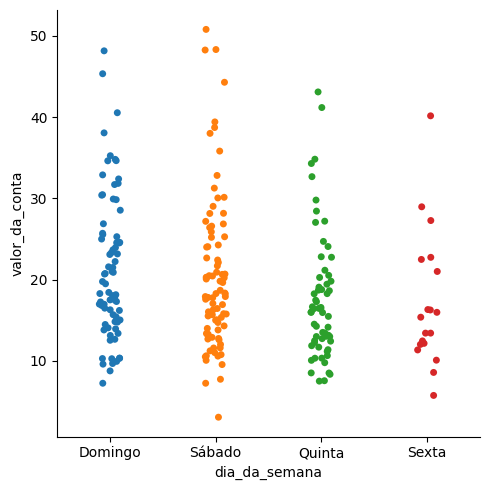

In [35]:
sns.catplot(x='dia_da_semana', y ='valor_da_conta', data=gorjetas, hue='dia_da_semana')

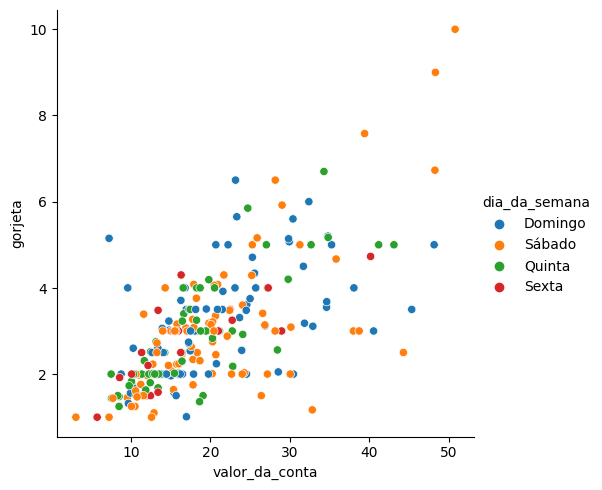

In [36]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

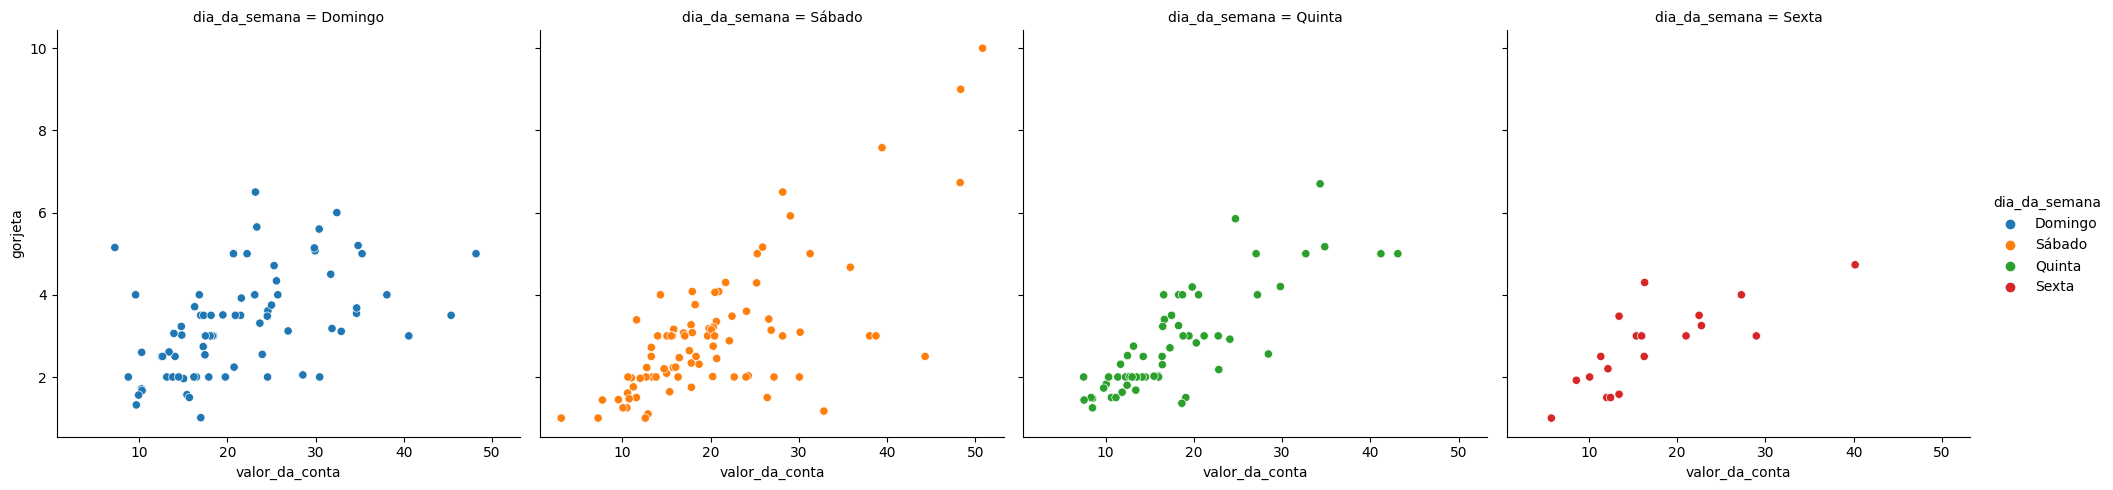

In [37]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

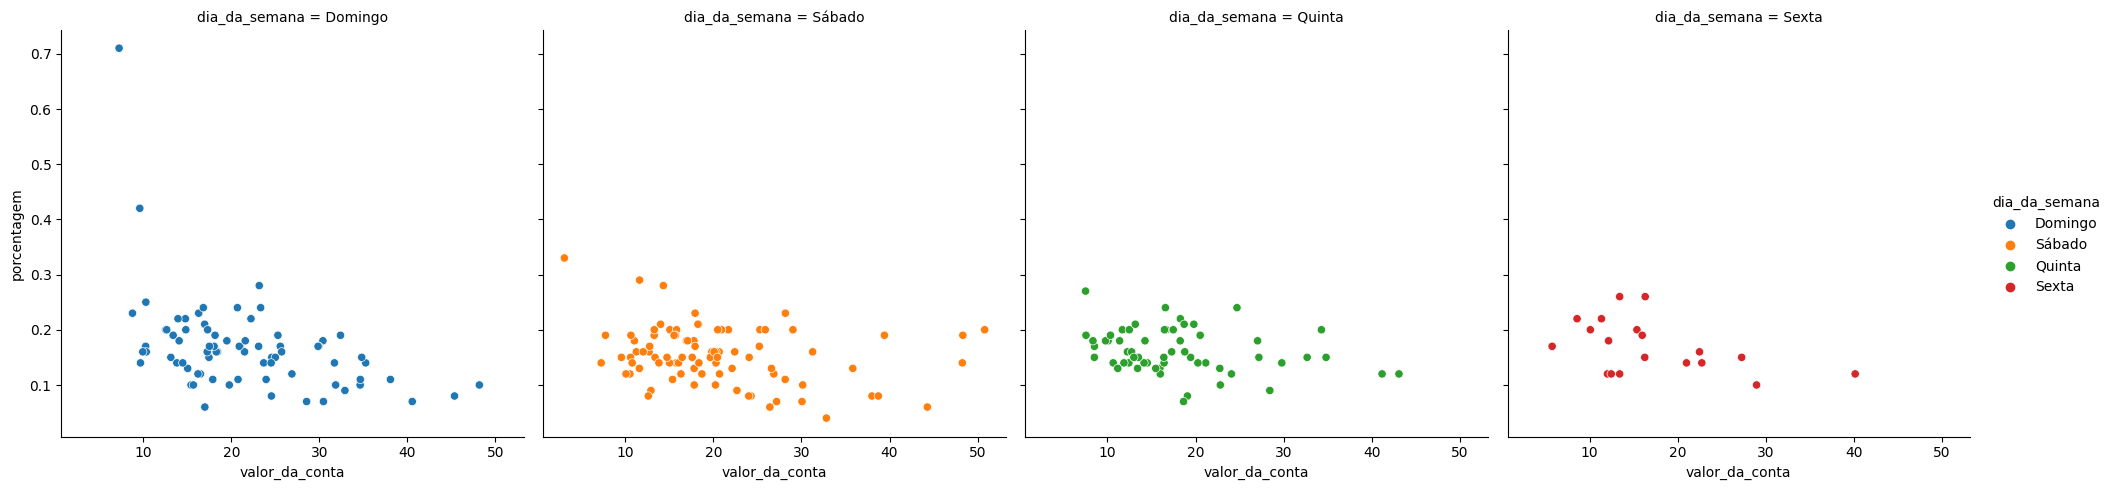

In [38]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

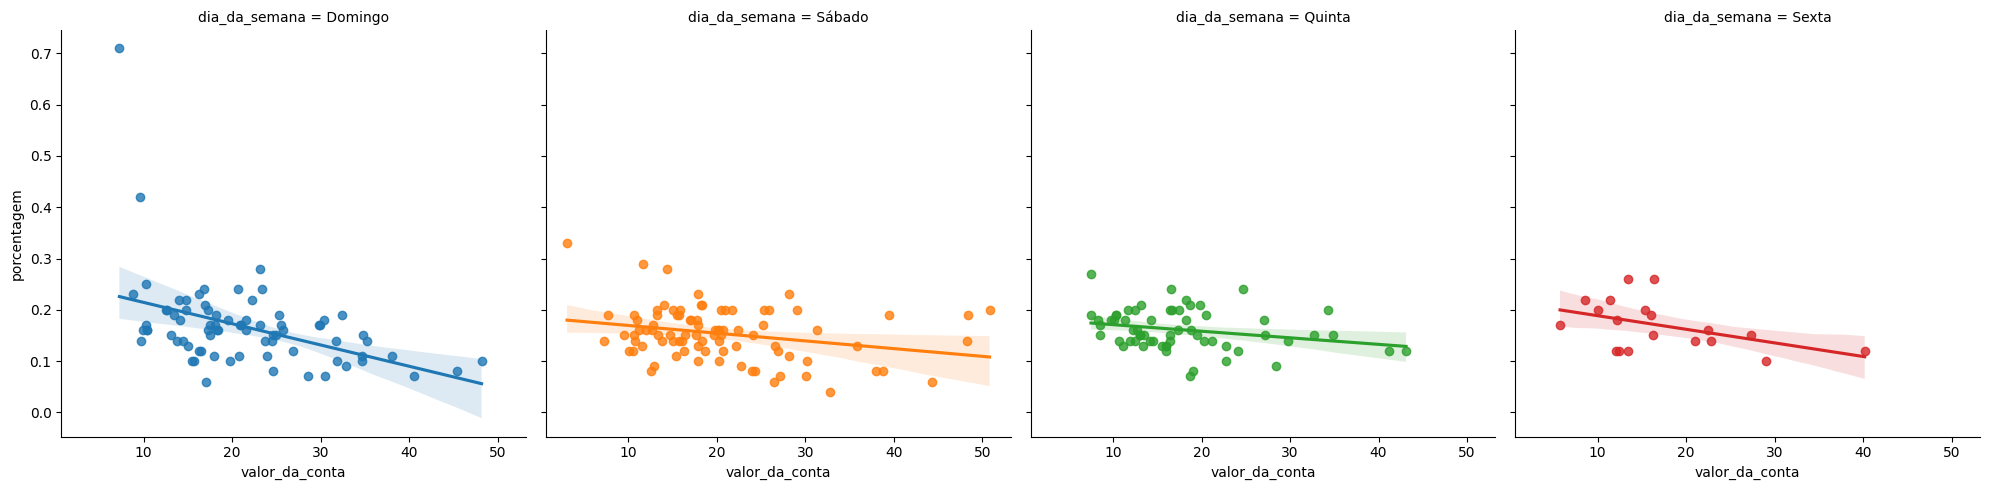

In [39]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [40]:
media_geral_gorjeta = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjeta))

A média geral das gorjetas é de 2.99827868852459


In [41]:
gorjetas.groupby(['dia_da_semana'])[['valor_da_conta', 'gorjeta', 'porcentagem']].mean(numeric_only=True)

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [42]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


dia_da_semana
Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: count, dtype: int64

### Teste de Hipótese

**H<sup>null</sup> → A distribuição do valor da conta é igual no sabado e no domingo**

**H<sup>null</sup> → A distribuição do valor da conta não é igual no sabado e no domingo**

In [43]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [44]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [45]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**Como nosso p-value deu maior do que 0.05 ficamos com nossa hipitese nula**

In [46]:
print('O valor do p-value é {}, e por isso ficamos com nossa hipotese nula'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443, e por isso ficamos com nossa hipotese nula


# Análise 4 - Hora do dia

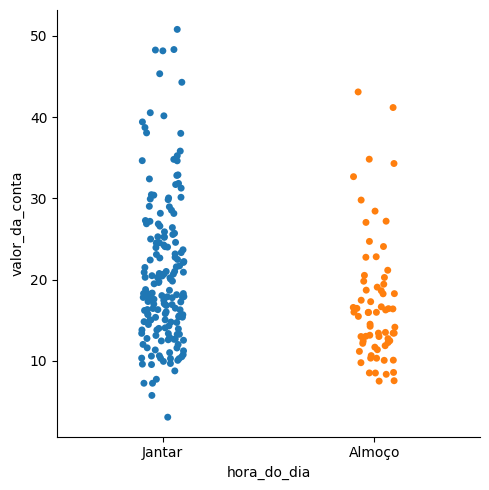

In [48]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, hue='hora_do_dia')

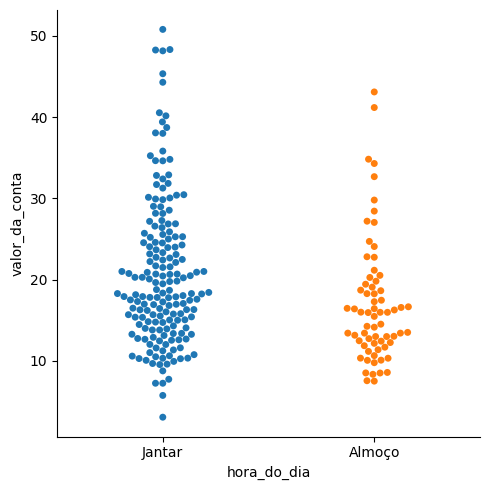

In [49]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas, hue='hora_do_dia', kind='swarm')

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

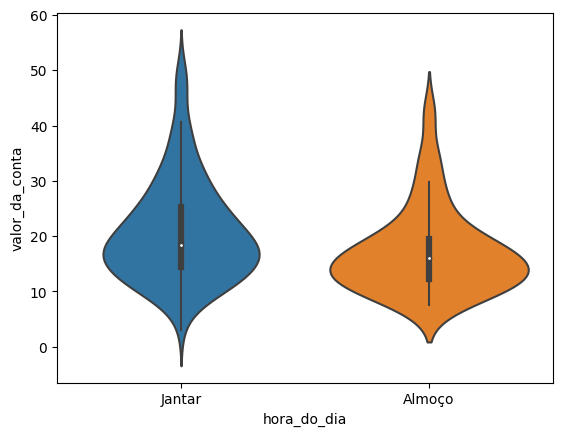

In [50]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

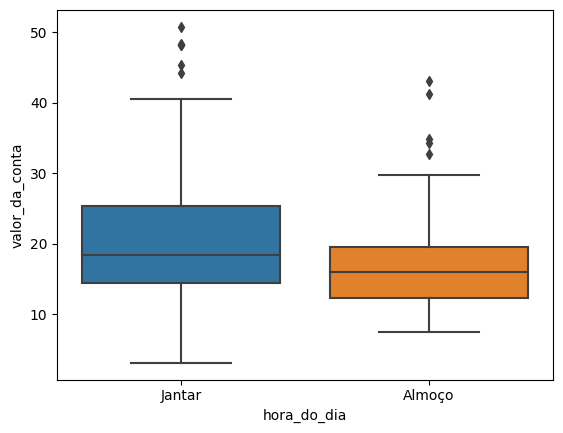

In [51]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [53]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<Axes: xlabel='valor_da_conta', ylabel='Count'>

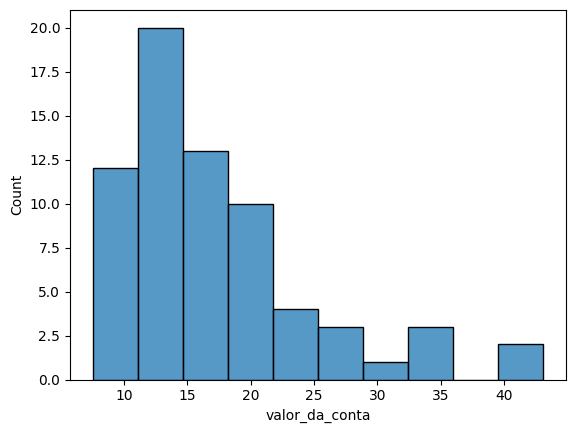

In [59]:
sns.histplot(almoco)

In [60]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<Axes: xlabel='valor_da_conta', ylabel='Count'>

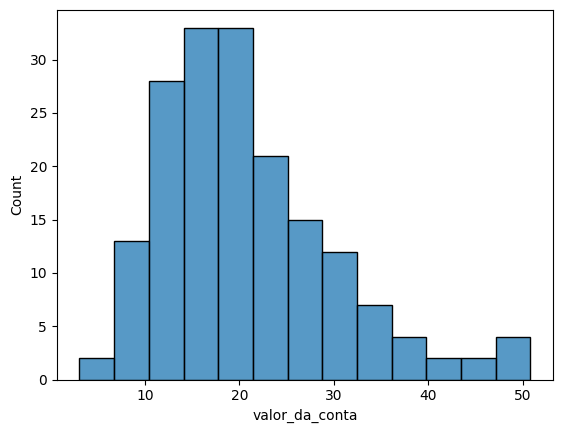

In [61]:
sns.histplot(jantar)

### Teste de Hipótese

**H<sup>null</sup> → A distribuição do valor da conta é igual no almoço e no jantar**

**H<sup>null</sup> → A distribuição do valor da conta não é igual no almoço e no jantar**

In [63]:
gorjetas.groupby(['hora_do_dia'])[['valor_da_conta', 'gorjeta', 'porcentagem']].mean(numeric_only=True)

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [65]:
r2 =ranksums(jantar, almoco)

In [67]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0011791039723641672


### Distribuição da taxa de gorjeta

In [68]:
almoco_p = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [69]:
jantar_p = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [70]:
r3 =ranksums(jantar_p, almoco_p)

In [71]:
print('O valor do p-value é {}'.format(r3.pvalue))

O valor do p-value é 0.2602493995587126
